<a href="https://colab.research.google.com/github/raeesa0017/Lok-Sabha-Election-2019-and-Winner-Prediction/blob/main/loksabha2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Lok** **Sabha** **Election** **2019** **and** **Winner** **Prediction**

##**Importing** libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing

In [ ]:
plt.style.use('seaborn-dark-palette')

<ipython-input-4-b3dc565f1aa5>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


##Loading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/Raa project/raaaaaa project/raaaaaa pro/LokSabha2019.csv'
data=pd.read_csv(path)

##Data **Exploration**

In [ ]:
data.head()

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender
0,Kuldeep Rai Sharma,INC,0,Graduate Professional,52,132233012.0,Andaman And Nicobar Islands,80450870,1.0,M
1,Ayan Mandal,AITC,0,Graduate,30,7270440.0,Andaman And Nicobar Islands,1500000,0.0,M
2,C G Saji Kumar,All India Hindustan Congress Party,0,12th Pass,48,120000.0,Andaman And Nicobar Islands,0,0.0,M
3,C U Rasheed,IND,0,12th Pass,34,202808.0,Andaman And Nicobar Islands,1700000,0.0,M
4,Gour Chandra Majumder,IND,0,Graduate,52,6062000.0,Andaman And Nicobar Islands,0,0.0,M


Data contains: Candidate - Name of the Candidate. Party - Policatical Party. Criminal Cases - Criminal Cases against candidate. Education - Education of candidate. Age - Age of candidate. Total Assets - Total assets of candidate. Constituency - Name of constituency from candidate stand in election. Liabilities - Total Liabilities of candidate. Winner - Does candidate won in election that year? (0 - No, 1- Yes) Gender - Gender of candidate. (M-Male, F-Female)

In [ ]:
data.shape

(7968, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7968 entries, 0 to 7967
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Candidate       7968 non-null   object 
 1   Party           7968 non-null   object 
 2   Criminal Cases  7968 non-null   int64  
 3   Education       7968 non-null   object 
 4   Age             7968 non-null   int64  
 5   Total Assets    7908 non-null   float64
 6   Constituency    7968 non-null   object 
 7   Liabilities     7968 non-null   int64  
 8   Winner          7968 non-null   float64
 9   Gender          7968 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 622.6+ KB


checking missing values



In [ ]:
data.isnull().sum()

Candidate          0
Party              0
Criminal Cases     0
Education          0
Age                0
Total Assets      60
Constituency       0
Liabilities        0
Winner             0
Gender             0
dtype: int64

In [ ]:
data['Total Assets']=data['Total Assets'].fillna(method='bfill')
data['Total Assets']

0       132233012.0
1         7270440.0
2          120000.0
3          202808.0
4         6062000.0
           ...     
7963     12578736.0
7964      1091556.0
7965      5400000.0
7966       946406.0
7967       910236.0
Name: Total Assets, Length: 7968, dtype: float64

In [ ]:
data.isnull().sum()

Candidate         0
Party             0
Criminal Cases    0
Education         0
Age               0
Total Assets      0
Constituency      0
Liabilities       0
Winner            0
Gender            0
dtype: int64

##EDA

statistics of dataset

In [ ]:
data.describe()

,Criminal Cases,Age,Total Assets,Liabilities,Winner
count,7968.000000,7968.000000,7.968000e+03,7.968000e+03,7968.000000
mean,0.573168,46.917294,4.204604e+07,5.576211e+06,0.038278
std,4.061399,12.535610,2.517300e+08,4.615829e+07,0.191879
min,0.000000,0.000000,9.000000e+00,0.000000e+00,0.000000
25%,0.000000,38.000000,5.016850e+05,0.000000e+00,0.000000
50%,0.000000,46.000000,2.750378e+06,0.000000e+00,0.000000
75%,0.000000,56.000000,1.308914e+07,6.189795e+05,0.000000
max,240.000000,90.000000,1.107583e+10,1.547511e+09,1.000000


In [ ]:
data.corr()

<ipython-input-217-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Criminal Cases,Age,Total Assets,Liabilities,Winner
Criminal Cases,1.000000,0.022932,0.030095,0.026409,-0.028157
Age,0.022932,1.000000,0.109618,0.065083,0.131775
Total Assets,0.030095,0.109618,1.000000,0.506363,0.137690
Liabilities,0.026409,0.065083,0.506363,1.000000,0.123813
Winner,-0.028157,0.131775,0.137690,0.123813,1.000000


##**Preprocessing** **of** **data**

In [ ]:
data.drop(['Candidate'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['Party', 'Criminal Cases', 'Education', 'Age', 'Total Assets',
       'Constituency', 'Liabilities', 'Winner', 'Gender'],
      dtype='object')

In [ ]:
data['Gender']=data['Gender'].map({'M':1,'F':0})

In [ ]:
data.duplicated(subset='Constituency')

0       False
1        True
2        True
3        True
4        True
        ...  
7963     True
7964     True
7965     True
7966     True
7967     True
Length: 7968, dtype: bool

since there are some anomalies found in the Party Column. There are more than one candidates belonging to same party nominated in same constituency.So we done groupby function to resolve this



In [ ]:
resultdata=data.groupby(['Constituency','Party'],as_index=False).first()

In [ ]:
resultdata

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Winner,Gender
0,Adilabad,Ambedkarite Party of India,0,5th Pass,33,2.740000e+05,0,0.0,1
1,Adilabad,BJP,52,12th Pass,52,3.099414e+06,231450,0.0,1
2,Adilabad,INC,3,12th Pass,53,3.649100e+07,15300000,0.0,1
3,Adilabad,IND,0,5th Pass,53,3.000000e+04,0,0.0,1
4,Adilabad,Janasena Party,0,Post Graduate,27,5.000000e+04,0,0.0,1
...,...,...,...,...,...,...,...,...,...
5079,Zahirabad,Bhartiya Anarakshit Party,0,Graduate,49,1.059100e+06,0,0.0,1
5080,Zahirabad,INC,0,Post Graduate,49,9.036630e+08,0,0.0,1
5081,Zahirabad,IND,0,Post Graduate,49,7.558960e+06,3000000,0.0,1
5082,Zahirabad,India Praja Bandhu Party,1,Post Graduate,33,5.078770e+05,84623,0.0,1


##**Data** **Visualization**

<ipython-input-224-04253eed9573>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(resultdata.corr(),annot=True)


<Axes: >

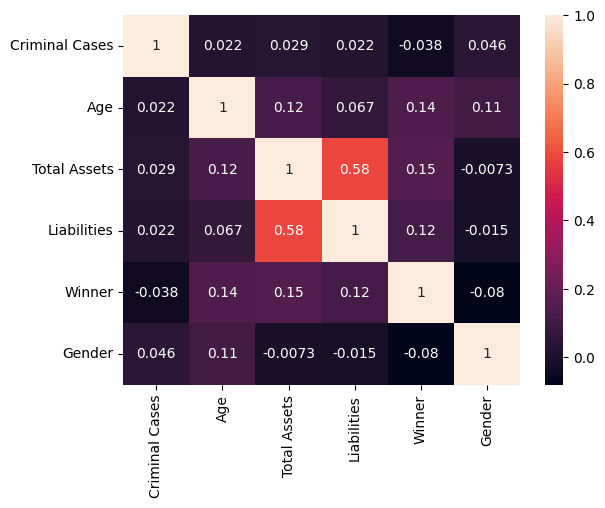

In [ ]:
#heatmap
sns.heatmap(resultdata.corr(),annot=True)

In [ ]:
resultdata['Education'].value_counts()

Graduate                 1020
Post Graduate             992
12th Pass                 768
10th Pass                 705
Graduate Professional     629
8th Pass                  371
5th Pass                  151
Literate                  147
Doctorate                 123
Others                    123
Illiterate                 46
Not Given                   9
Name: Education, dtype: int64

<Axes: title={'center': 'AGE of LOK SABHA candidates'}>

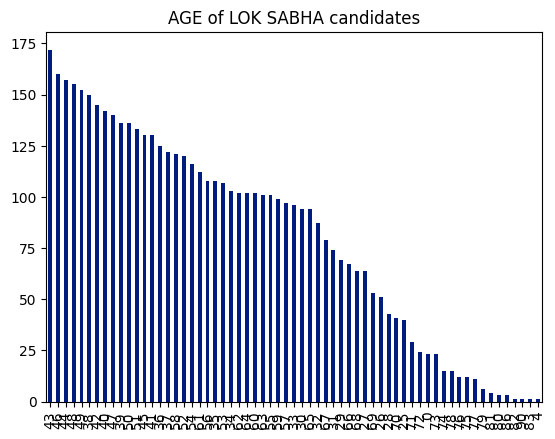

In [ ]:
resultdata['Age'].value_counts().plot.bar(title='AGE of LOK SABHA candidates')

In [ ]:
resultdata['Gender'].value_counts()

1    4652
0     432
Name: Gender, dtype: int64

<Axes: title={'center': 'No of MALES and FEMALES Participated in LOK SHABA Elections'}>

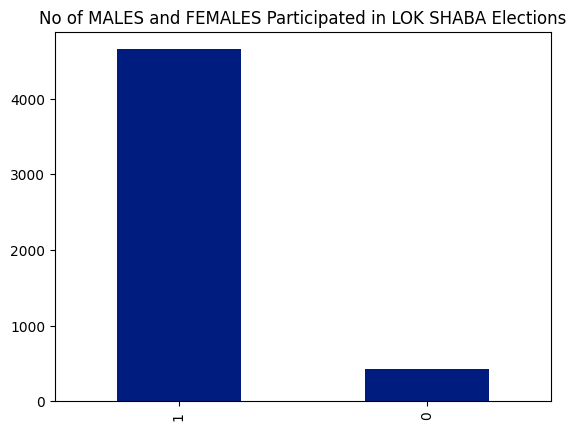

In [ ]:
resultdata['Gender'].value_counts().plot.bar(title='No of MALES and FEMALES Participated in LOK SHABA Elections')

Text(0.5, 1.0, 'No of Males and Females Won and Lost in LOK SHABA Elections')

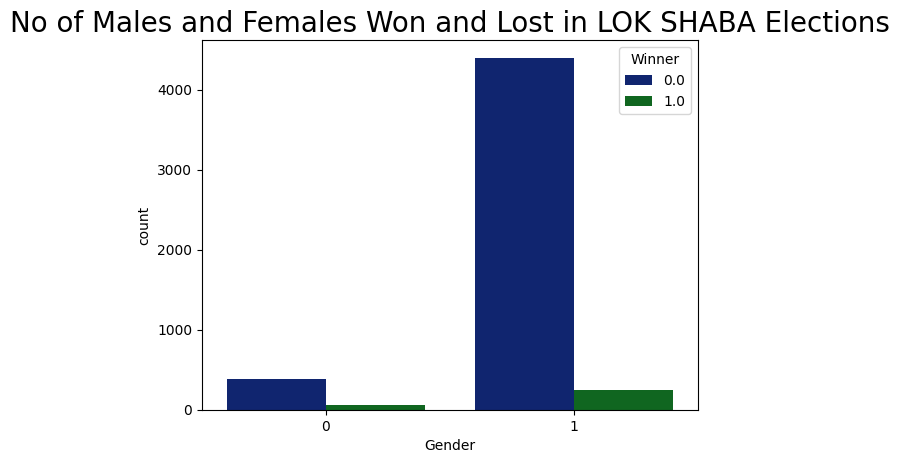

In [ ]:
a = sns.countplot(data=resultdata,x='Gender',hue='Winner')
a.set_title('No of Males and Females Won and Lost in LOK SHABA Elections',fontsize=20)

<Axes: >

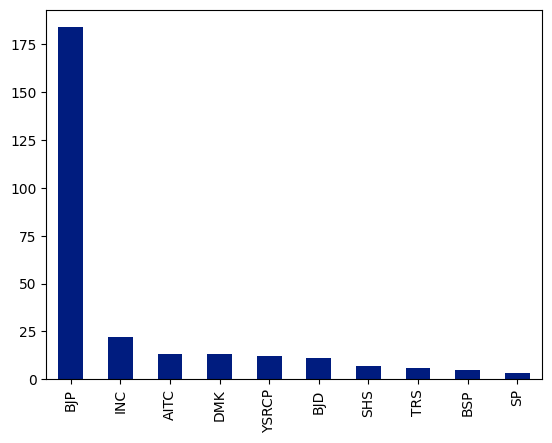

In [ ]:
# Number of Seats WON by Parties (TOP 10)
resultdata['Party'][(resultdata['Winner']==1)].value_counts().head(10).plot.bar()

Text(0.5, 1.0, 'Number of NON-CRIMINAL AND CRIMINAL BACKGROUND CANDIDATES Won and Lost')

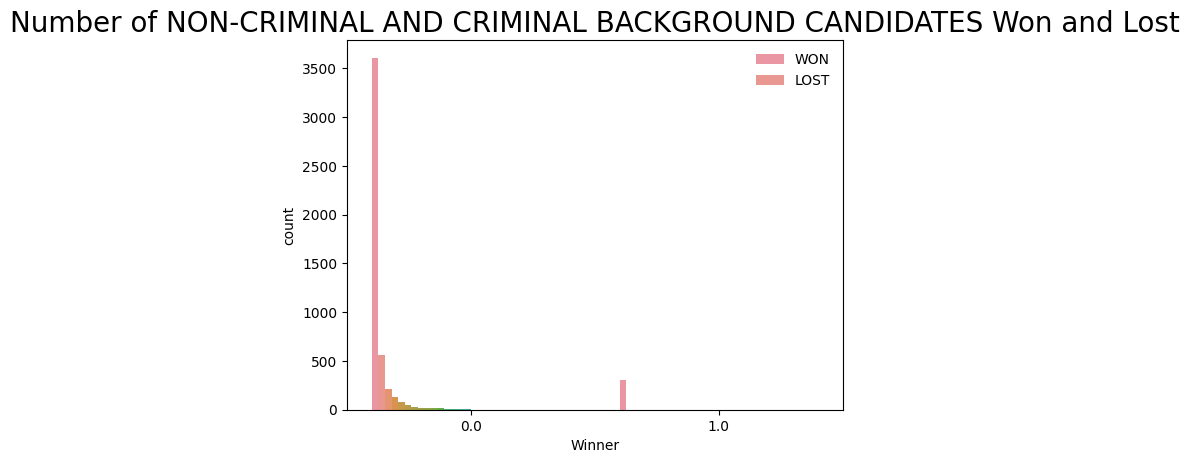

In [ ]:
a=sns.countplot(data=resultdata,x='Winner',hue='Criminal Cases')
a.legend(['WON','LOST'],loc='upper right',frameon=False)
a.set_title('Number of NON-CRIMINAL AND CRIMINAL BACKGROUND CANDIDATES Won and Lost',fontsize=20)

Text(0.5, 0, 'Political Parties')

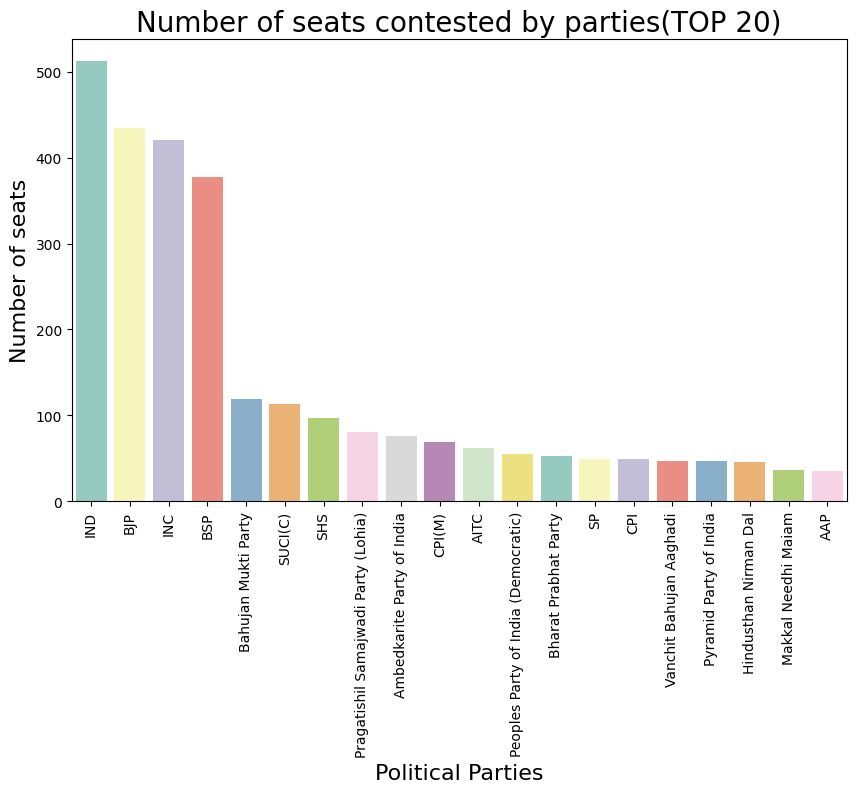

In [ ]:
temp=resultdata['Party'].value_counts().head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=temp.index, y=temp.values,palette='Set3')
plt.xticks(rotation=90)
plt.title('Number of seats contested by parties(TOP 20)',fontsize=20)
plt.ylabel('Number of seats',fontsize=16)
plt.xlabel('Political Parties',fontsize=16)


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
resultdata['Education']=le.fit_transform(resultdata['Education'])
resultdata['Constituency']=le.fit_transform(resultdata['Constituency'])
resultdata['Party']=le.fit_transform(resultdata['Party'])


In [ ]:
resultdata

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Winner,Gender
0,0,69,0,2,33,2.740000e+05,0,0.0,1
1,0,97,52,1,52,3.099414e+06,231450,0.0,1
2,0,243,3,1,53,3.649100e+07,15300000,0.0,1
3,0,244,0,2,53,3.000000e+04,0,0.0,1
4,0,292,0,11,27,5.000000e+04,0,0.0,1
...,...,...,...,...,...,...,...,...,...
5079,541,151,0,5,49,1.059100e+06,0,0.0,1
5080,541,243,0,11,49,9.036630e+08,0,0.0,1
5081,541,244,0,11,49,7.558960e+06,3000000,0.0,1
5082,541,249,1,11,33,5.078770e+05,84623,0.0,1


##**Model** **Creation**

In [ ]:
#model prediction
x=resultdata.drop('Winner',axis=1)
y=resultdata['Winner']

In [ ]:
x

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Gender
0,0,69,0,2,33,2.740000e+05,0,1
1,0,97,52,1,52,3.099414e+06,231450,1
2,0,243,3,1,53,3.649100e+07,15300000,1
3,0,244,0,2,53,3.000000e+04,0,1
4,0,292,0,11,27,5.000000e+04,0,1
...,...,...,...,...,...,...,...,...
5079,541,151,0,5,49,1.059100e+06,0,1
5080,541,243,0,11,49,9.036630e+08,0,1
5081,541,244,0,11,49,7.558960e+06,3000000,1
5082,541,249,1,11,33,5.078770e+05,84623,1


##**outlier** detection

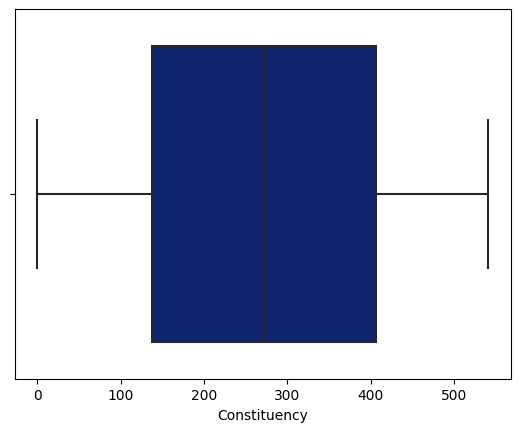

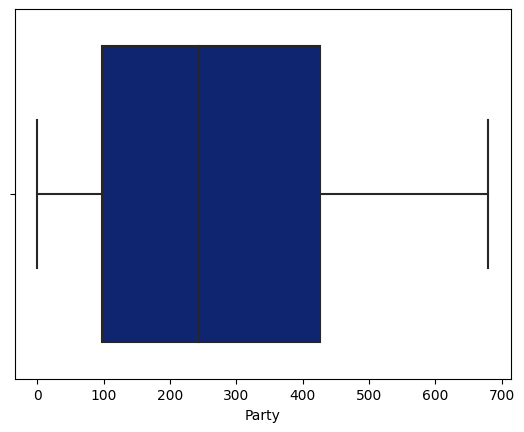

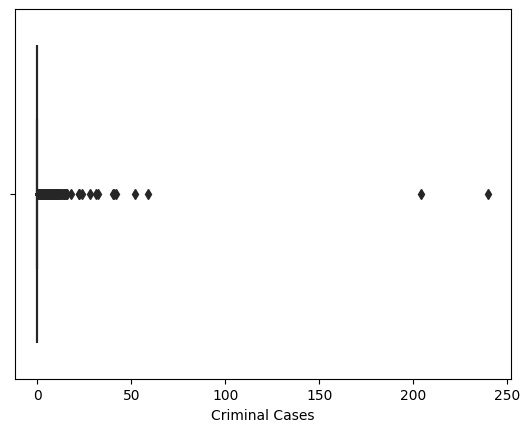

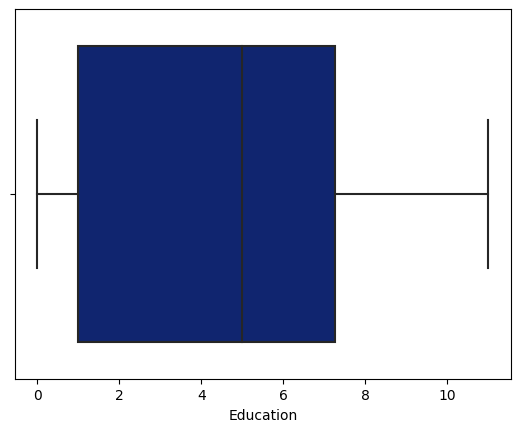

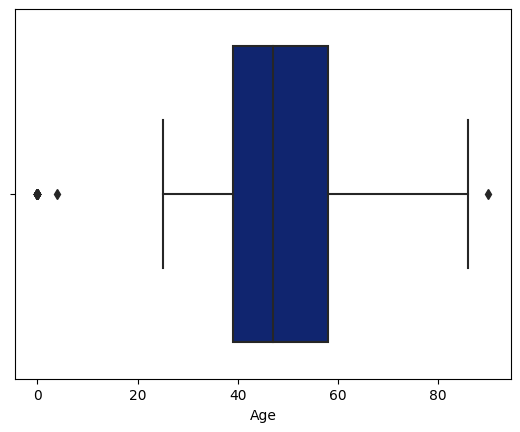

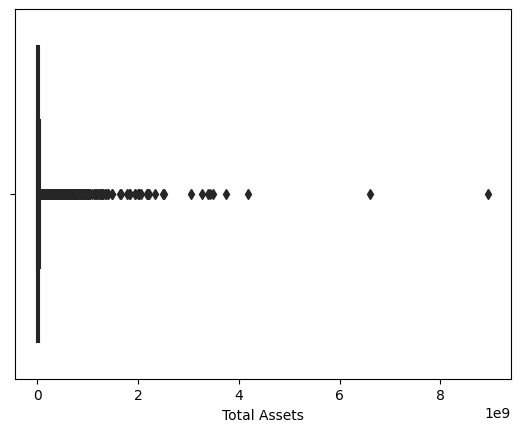

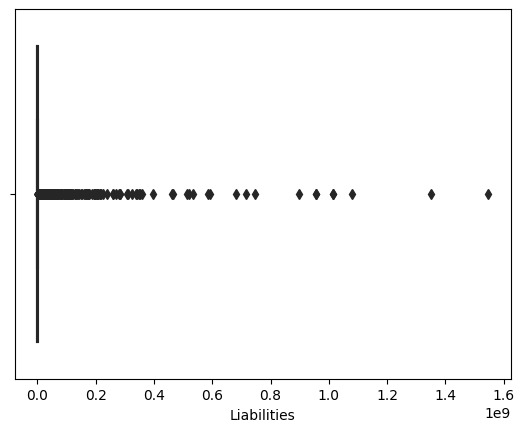

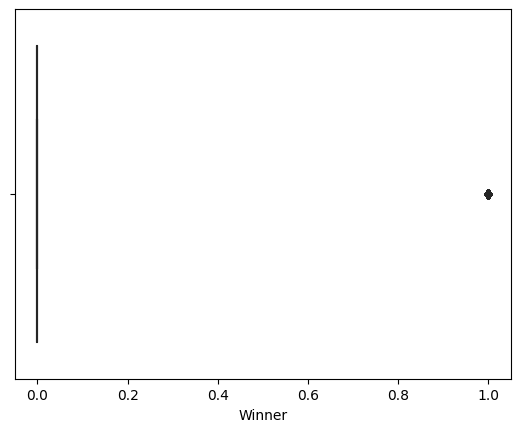

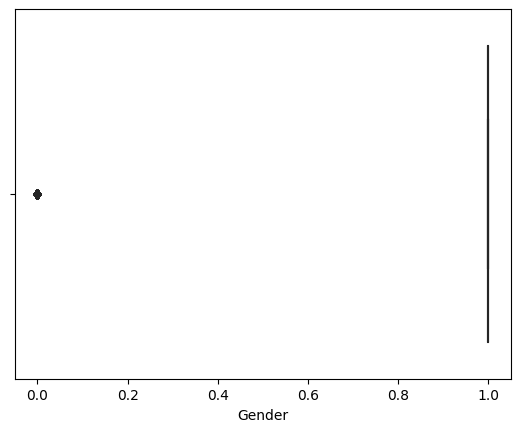

In [ ]:
%matplotlib inline
#outlier handling
import seaborn as sns
for i in resultdata:
    sns.boxplot(x=resultdata[i])
    plt.show()

<Axes: >

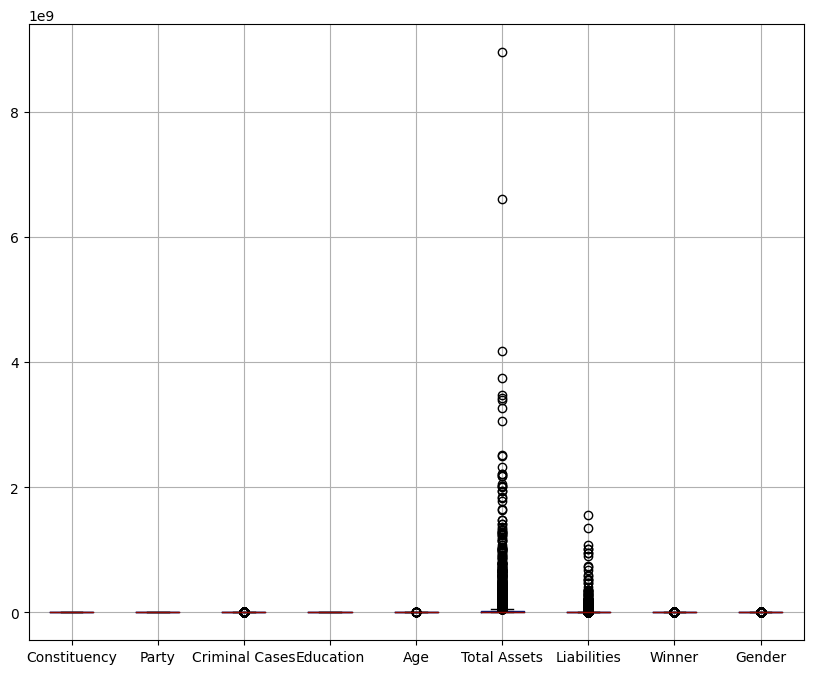

In [ ]:
resultdata.boxplot(figsize=(10,8))

In [ ]:
#charges
from scipy import stats

In [ ]:
IQR=stats.iqr(resultdata.Age,interpolation='midpoint')
IQR

19.0

In [ ]:
Q1=resultdata['Age'].quantile(0.25)
Q3=resultdata['Age'].quantile(0.75)
max=Q3+1.5*IQR
min=Q1-1.5*IQR

In [ ]:
min


10.5

In [ ]:
max

86.5

In [ ]:
resultdata.loc[data["Age"]>max]

,Constituency,Party,Criminal Cases,Education,Age,Total Assets,Liabilities,Winner,Gender
4279,455,244,10,0,48,816680.0,0,0.0,1


In [ ]:
resultdata.loc[data['Age']<min]=25

Feature Mapping

In [ ]:
x_scaled=preprocessing.scale(x)

##**Model** **Creation**

In [ ]:
#spliting of dataset into train data and test data
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.3)
xtrain.shape,ytrain.shape,xtest.shape


((3558, 8), (3558,), (1526, 8))

##1 logistic regression

In [ ]:
#1 logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

Prediction in test data

In [ ]:
#prediction in test data
predict=model.predict(xtest)
predict

array([0., 0., 0., ..., 0., 1., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
model.accuracy=accuracy_score(ytest,predict)
model.accuracy

0.936435124508519

prediction in train data

In [ ]:
#prediction in train data
train_predict=model.predict(xtrain)
train_predict
model.train_accuracy=accuracy_score(train_predict,ytrain)
model.train_accuracy

0.9359190556492412

confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
#plot_confusion_matrix(model,xtest,ytest)
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1430
         1.0       0.43      0.03      0.06        92
        25.0       0.00      0.00      0.00         4

    accuracy                           0.94      1526
   macro avg       0.46      0.34      0.34      1526
weighted avg       0.91      0.94      0.91      1526



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##2 Random forest classifier

In [ ]:
#2 random forest classifier
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier(n_estimators=1000)
modelrf.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=1000)

pRedictn in testing data

In [ ]:
predr = modelrf.predict(xtest)
predr

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
modelrf.score(xtrain,ytrain)
modelrf.accuracy=modelrf.score(xtest,ytest)
modelrf.accuracy

0.95478374836173

prediction in train data

In [ ]:
#prediction in train data
train_predictrf=modelrf.predict(xtrain)
train_predictrf
modelrf.train_accuracy=accuracy_score(train_predictrf,ytrain)
modelrf.train_accuracy


1.0

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

#plot_confusion_matrix(model,xtest,ytest)
print(classification_report(ytest,predr))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1430
         1.0       0.73      0.47      0.57        92
        25.0       0.00      0.00      0.00         4

    accuracy                           0.95      1526
   macro avg       0.56      0.49      0.52      1526
weighted avg       0.95      0.95      0.95      1526



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##3 KNN

In [ ]:
#3 knn
from sklearn.neighbors import KNeighborsClassifier
modelk=KNeighborsClassifier(n_neighbors=3)
modelk.fit(xtrain,ytrain)
predk=modelk.predict(xtest)
predk
modelk.accuracy=modelk.score(xtest,ytest)
modelk.accuracy

0.927916120576671

prediction in train data

In [ ]:
#prediction in train data
train_predk=modelk.predict(xtrain)
modelk_trainaccuracy=accuracy_score(train_predk,ytrain)
modelk_trainaccuracy

0.9525014052838673

##4 Decision tree classifier

In [ ]:
#4 decision tree classifier
from sklearn.tree import DecisionTreeClassifier
modeld = DecisionTreeClassifier()
modeld.fit(xtrain,ytrain)
predd=modeld.predict(xtest)
predd
modeld.accuracy=modeld.score(xtest,ytest)
modeld.accuracy

0.927916120576671

prediction in train data

In [ ]:
train_predd=modeld.predict(xtrain)
modeld_trainaccuracy=accuracy_score(train_predd,ytrain)
modeld_trainaccuracy

1.0

##5 SVM

In [ ]:
#5 SVM classifictn
from sklearn.svm import SVC
modelsvm=LogisticRegression()
modelsvm.fit(xtrain,ytrain)
predsvm=modelsvm.predict(xtest)
predsvm
modelsvm.accuracy=modelsvm.score(xtest,ytest)
modelsvm.accuracy

0.936435124508519

prediction in train data

In [ ]:
train_predsvm=modelsvm.predict(xtrain)
modelsvm_trainaccuracy=accuracy_score(train_predsvm,ytrain)
modelsvm_trainaccuracy

0.9359190556492412

##6 ADA BOOST CLASSIFIER

In [ ]:
#6 ADA BOOST CLASSIFIER
from sklearn.ensemble import AdaBoostClassifier
modela = AdaBoostClassifier()
modela.fit(xtrain,ytrain)
preda = modela.predict(xtest)
preda
modela.accuracy=accuracy_score(ytest,preda)
modela.accuracy

0.9495412844036697

prediction in train data



In [ ]:
train_preda=modela.predict(xtrain)
modela_trainaccuracy=accuracy_score(train_preda,ytrain)
modela_trainaccuracy

0.9502529510961214

##CONCLUSION

In [ ]:
models=pd.DataFrame({'Model': ['Logistic Regression','Random Forest','KNN','Decision Tree Classifier','Support Vector Machine','Ada Boost Classifier'],  'Test_Score': [model.accuracy,modelrf.accuracy,modelk.accuracy,modeld.accuracy,modelsvm.accuracy,modela.accuracy], 'Train_Score' :[model.train_accuracy,modelrf.train_accuracy,modelk_trainaccuracy,modeld_trainaccuracy,modelsvm_trainaccuracy,modela_trainaccuracy
]})
models.sort_values(by='Test_Score',ascending=False)

,Model,Test_Score,Train_Score
1,Random Forest,0.954784,1.000000
5,Ada Boost Classifier,0.949541,0.950253
0,Logistic Regression,0.936435,0.935919
4,Support Vector Machine,0.936435,0.935919
2,KNN,0.927916,0.952501
3,Decision Tree Classifier,0.927916,1.000000
